In [1097]:
import numpy as np
from matplotlib import pyplot
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
from IPython import display
import urllib
#!pip install scipy (uncomment if error is given saying no module named 'scipy' is given)
from scipy import integrate
from IPython.core.display import display, HTML
%matplotlib inline

#use LaTeX in plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Method of Images
Recall that potential flow is linear. This fact is incredibly important since the principle of superposition can be applied to generate more complex flow. When a potential flow element (e.g. source, doublet, etc.) is placed by an impenetrable wall, it generates incorrect results with the previously derived streamfunctions and velocity components. To resolve this, the same potential flow element must be placed on the opposite side of this wall. Consider a source placed at a distance $l$ from a wall, say at point $(0, l)$. Applying the method of images, we place a source of equal magnitude at a distance $l$ on the opposite side of the wall at $(0, -l)$. From here, the principle of superposition can be applied to determine any desired quantity. By the no-flow-through boundary condition, $v = 0$ because if $v \neq 0 $, fluid would flow through the wall, which is physically impossible. So the velocity component along the wall must consist of only a $u$ component.

In [1098]:
#setup the grid
N = 50                                          #number of lines in each direction
x_lower, x_upper = -5, 5                         #x limit boundaries
y_lower, y_upper = -5, 5                         #y limit boundaries
X = np.linspace(x_lower, x_upper, N)             #points along the grid in the x direction
Y = np.linspace(y_lower, y_upper, N)             #points along the grid in the y direction
X_grid, Y_grid = np.meshgrid(X, Y)               #create the grid
L = 10                                           #length of the plot
H = 10                                           #height of the plot

We will now create a `class` that calculate various parameters of a doublet. Recall that, in Cartesian coordinates, the velocity components, streamfunction, and velocity potential are
$$u = -\frac{D}{2\pi}\frac{\left(x - x_D\right)^2 - \left(y - y_D\right)^2}{\left((x - x_D)^2 + (y - y_D)^2 \right)^2}, \quad v = -\frac{D}{2\pi}\frac{2\left(x - x_D \right)\left(y - y_D \right)}{\left((x - x_D)^2 + (y - y_D)^2\right)^2}$$
$$\psi = -\frac{D}{2\pi}\frac{y - y_D}{(x - x_D)^2 + (y - y_D)^2} $$
$$\phi = \frac{D}{2\pi}\frac{x - x_D}{(x - x_D)^2 + (y - y_D)^2} $$

In [1099]:
class Doublet:
    """
    Contains several functions that describe the characteristics of doublet flow.
    Has three variables (apart from self): D, x_D, y_D
    D is the doublet strength, x_D is the x coordinate of the doublet's location,
    and y_D is the y coordinate of the doublet's location
    """
    #init constructor
    def __init__(self, D, x_D, y_D):
        self.D = D
        self.x_D = x_D
        self.y_D = y_D
        
    def velocity(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        u: u component of doublet velocity
        v: v component of doublet velocity
        """
        u = -self.D / (2 * math.pi) * ((X_grid - self.x_D)**2 - (Y_grid - self.y_D)**2) / \
            ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)**2
        v = -self.D / (2 * math.pi) * (2*(X_grid - self.x_D) * (Y_grid - self.y_D)) / \
            ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)**2
        return u, v
    
    def streamfunction(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ψ: 2D np array of streamfunction (ψ) on the meshgrid
        """
        ψ = -self.D / (2 * math.pi) * (Y_grid - self.y_D) / ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)
        return ψ
    
    def velocityPotential(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ϕ: 2D np array of velocity potential (ϕ) on the meshgrid
        """
        ϕ = self.D / (2 * math.pi) * (X_grid - self.x_D) / ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)
        return ϕ

## Creating an Impenetrable Wall and Example Problem
To generate a horizontal line that represents a wall, `axhline` is used. 

Example Problem: Consider a doublet at $(0, 1)$ and a freestream of velocity $U_\infty = 1$ m/s with an impenetrable boundary at $y = 0$. Using the method of images and the principle of superposition, obtain the corresponding velocity components, streamfunction, and velocity potential.

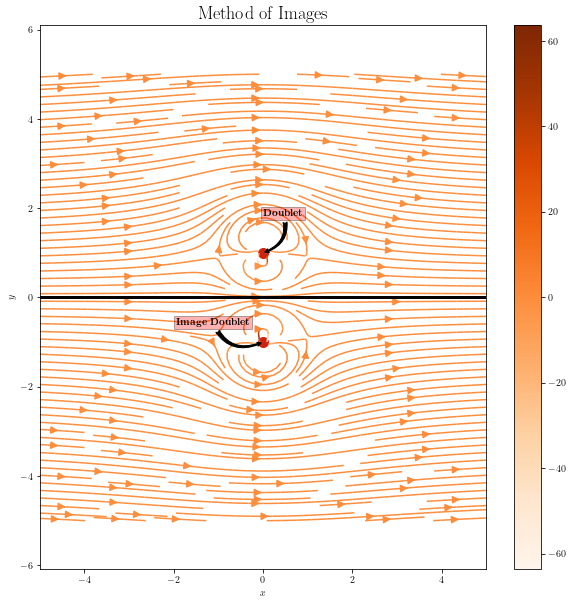

In [1100]:
D = 7.0            #strength of the doublet
x_D, y_D = 0, 1.0  #coordinates of the doublet
U_infty = 1.0      #velocity of freestream

#Create an object of the doublet at (0,3)
doublet = Doublet(D, x_D, y_D)
u_d, v_d = doublet.velocity(X_grid, Y_grid)
ψ_d = doublet.streamfunction(X_grid, Y_grid)
ϕ_d = doublet.velocityPotential(X_grid, Y_grid)

#Create an object of the image doublet at (0, -3)
doublet_image = Doublet(D, x_D, -y_D)
u_i, v_i = doublet_image.velocity(X_grid, Y_grid)
ψ_i = doublet_image.streamfunction(X_grid, Y_grid)
ϕ_i = doublet_image.velocityPotential(X_grid, Y_grid)

#Freestream characteristics
u_f = 1.0 * np.ones((N,N))
v_f = np.zeros((N,N))
ψ_f = U_infty * Y_grid
ϕ_f = U_infty * X_grid

#Apply superposition
u = u_d + u_i + u_f
v = v_d + v_i + v_f
ψ = ψ_d + ψ_i + ψ_f
ϕ = ϕ_d + ϕ_i + ϕ_f

#Plot the data
fig = plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Method of Images', fontsize=18)
plt.scatter(x_D, y_D, s=100, color='#CD2310') 
plt.scatter(x_D, -y_D, s=100, color='#CD2310')
stream = plt.streamplot(X_grid, Y_grid, u, v, color = v, arrowsize=1.5, density = 2, linewidth = 1.5, cmap ='Oranges')
fig.colorbar(stream.lines)
plt.annotate(r'\textbf{Doublet}', xy=(x_D, y_D), xytext=(20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.5', 
            color='black'));
plt.annotate(r'\textbf{Image Doublet}', xy=(x_D, -y_D), xytext=(-50,15), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.5', 
            color='black'));
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');

<ipython-input-1101-f9ce5bb32fe6>:14: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  CS = colorcontour.ax.contour(X_grid, Y_grid, ϕ, origin='lower', extend='both',
<ipython-input-1101-f9ce5bb32fe6>:16: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  colorcontour.ax.clabel(CS, fontsize=10)


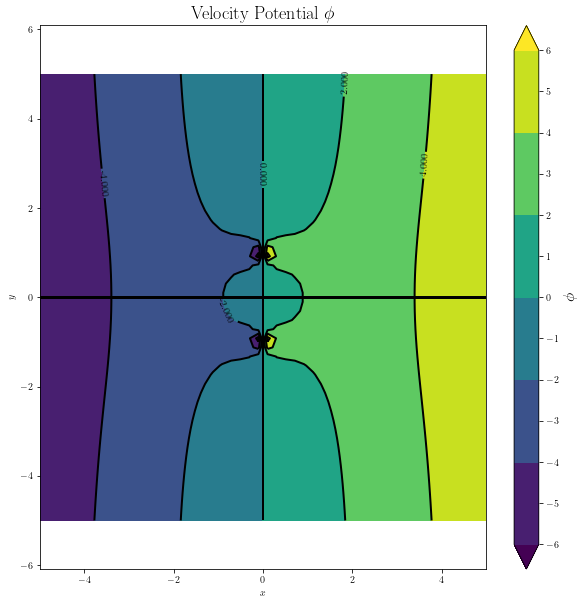

In [1101]:
#velocity potential plot
plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Velocity Potential $\phi$', fontsize=18)
plt.scatter(x_D, y_D, s=100, color='#CD2310') 
plt.scatter(x_D, -y_D, s=100, color='#CD2310')
colorcontour = plt.contourf(X_grid, Y_grid, ϕ, extend='both')
colorbar1 = plt.colorbar(colorcontour)
colorbar1.set_ticks([-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
colorbar1.ax.set_ylabel(r'$\phi$', fontsize=16)
CS = colorcontour.ax.contour(X_grid, Y_grid, ϕ, origin='lower', extend='both',
                linewidths=2, colors='k', linestyles='solid')
colorcontour.ax.clabel(CS, fontsize=10)
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');

<ipython-input-1102-b1dec5b4b4e8>:14: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  CS = colorcontour.ax.contour(X_grid, Y_grid, ψ, origin='lower', extend='both',
<ipython-input-1102-b1dec5b4b4e8>:16: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  colorcontour.ax.clabel(CS, fontsize=10)


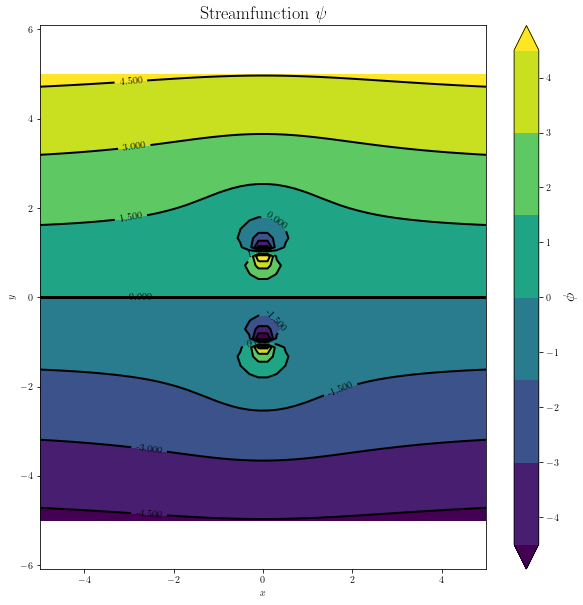

In [1102]:
#streamfunction plot
plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Streamfunction $\psi$', fontsize=18)
plt.scatter(x_D, y_D, s=100, color='#CD2310') 
plt.scatter(x_D, -y_D, s=100, color='#CD2310')
colorcontour = plt.contourf(X_grid, Y_grid, ψ, extend='both')
colorbar1 = plt.colorbar(colorcontour)
colorbar1.set_ticks([-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
colorbar1.ax.set_ylabel(r'$\phi$', fontsize=16)
CS = colorcontour.ax.contour(X_grid, Y_grid, ψ, origin='lower', extend='both',
                linewidths=2, colors='k', linestyles='solid')
colorcontour.ax.clabel(CS, fontsize=10)
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');

From these two contour plots, we can see the streamlines and potential lines are perpendicular (or orthogonal) to one another.

Let's create classes for various other elementary potential flows. For a source/sink, the desired quantities in Cartesian coordinates are
$$u = \frac{Q}{2\pi}\frac{x - x_{source}}{(x - x_{source})^2 + (y - y_{source})^2}, \quad v = \frac{Q}{2\pi}\frac{y - y_{source}}{(x - x_{source})^2 + (y - y_{source})^2} $$
$$\psi = \frac{Q}{2\pi}\arctan\left(\frac{y - y_{source}}{x - x_{source}}\right)$$
$$\phi = \frac{Q}{2\pi}\ln\sqrt{(x - x_{source})^2 + (y - y_{source})^2}$$

In [1103]:
class Source:
    """
    Contains several functions that describe the characteristics of source/sink.
    Has three variables (apart from self): Q, x_s, y_s
    - Q is the source/sink strength (> 0 for source, < 0 for sink)
    - x_s is the x coordinate of the source/sink's location
    - y_s is the y coordinate of the source/sink's location
    """
    #init constructor
    def __init__(self, Q, x_s, y_s):
        self.Q = Q
        self.x_s = x_s
        self.y_s = y_s
        
    def velocity(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        u: u component of source/sink velocity
        v: v component of source/sink velocity
        """
        u = self.Q / (2 * math.pi) * (X_grid - self.x_s) / ((X_grid - self.x_s)**2 + \
            (Y_grid - self.y_s)**2)
        v = self.Q / (2 * math.pi) * (Y_grid - self.y_s) / ((X_grid - self.x_s)**2 + \
            (Y_grid - self.y_s)**2)
        return u, v
    
    def streamfunction(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ψ: 2D np array of streamfunction (ψ) on the meshgrid
        """
        ψ = self.Q / (2 * math.pi) * np.arctan2((Y_grid - self.y_s), (X_grid - self.x_s))
        return ψ
        
    def velocityPotential(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ϕ: 2D np array of velocity potential (ϕ) on the meshgrid
        """
        ϕ = self.Q / (2 * math.pi) * np.log(np.sqrt((X_grid - self.x_s)**2 + \
            (Y_grid - self.y_s)**2))
        return ϕ

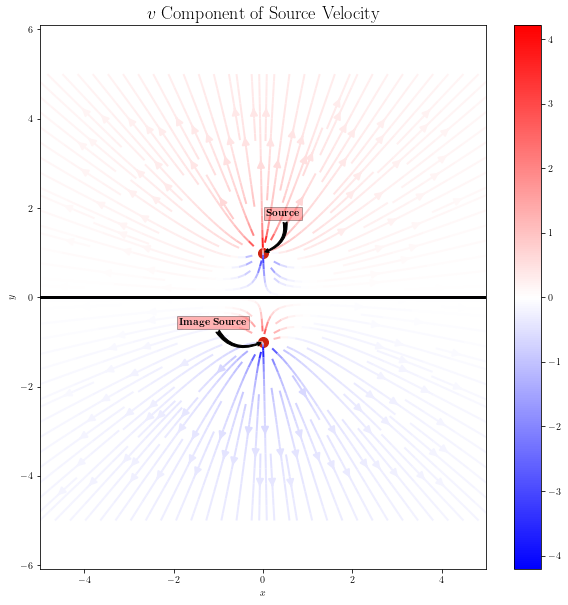

In [1104]:
Q = 5.0                        #strength of the source
x_s, y_s = 0.0, 1.0            #coordinates of the source

#Create an object of the source
source = Source(Q, x_s, y_s)
u_s, v_s = source.velocity(X_grid, Y_grid)
ψ_s = source.streamfunction(X_grid, Y_grid)
ϕ_s = source.velocityPotential(X_grid, Y_grid)

#Create an object of the image source
source_image = Source(Q, x_s, -y_s)
u_si, v_si = source_image.velocity(X_grid, Y_grid)
ψ_si = source_image.streamfunction(X_grid, Y_grid)
ϕ_si = source_image.velocityPotential(X_grid, Y_grid)

#Apply superposition
u_super = u_s + u_si
v_super = v_s + v_si
ψ_super = ψ_s + ψ_si
ϕ_super = ϕ_s + ϕ_si

#Plot the data
fig = plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$v$ Component of Source Velocity', fontsize=18)
plt.scatter(x_s, y_s, s=100, color='#CD2310') 
plt.scatter(x_s, -y_s, s=100, color='#CD2310')
stream = plt.streamplot(X_grid, Y_grid, u_super, v_super, color = v_super, arrowsize=1.5, density = 2, linewidth = 2.0, cmap ='bwr')
fig.colorbar(stream.lines)
plt.annotate(r'\textbf{Source}', xy=(x_s, y_s), xytext=(20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.5', 
            color='black'));
plt.annotate(r'\textbf{Image Source}', xy=(x_s, -y_s), xytext=(-50,15), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.5', 
            color='black'));
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');

This plot is qualitatively correct because of the fact that the $v$ component is 0 along the wall at $y = 0$. The no-flow-through boundary condition ensures that no fluid passes through the wall, and along the wall, the plot is white, indicating no vertical velocity component.

# Point Vortex at a 90$^{\circ}$ corner
Consider a point vortex of strength $\Gamma$ placed at a point $(l, h)$ next to a 90$^{\circ}$ corner that is described by $x = y = 0$. Applying the method of images is not as straight forward as the previous examples. To generate proper streamlines, 3 other vortices must be placed in the configuration shown below.
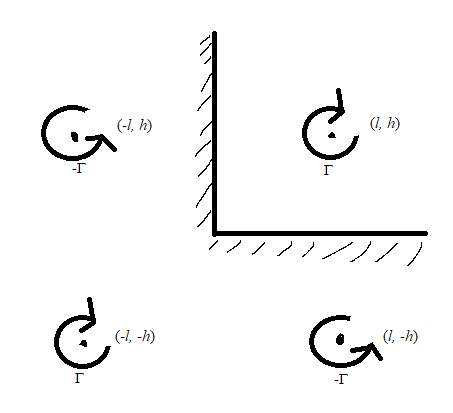
This configuration allows the generation of stagnation streamlines along the horizontal and vertical axes. On an aside, the physical meaning of the streamfunction $\psi$ is the volume flow through the streamline. Let's plot this configuration in Python.

In [1105]:
class Vortex:
    """
    Contains several functions that describe the characteristics of vortex flow.
    Has three variables (apart from self): Γ, x_v, y_v
    - Γ is the vortex strength
    - x_v is the x coordinate of the vortex's location,
    - y_v is the y coordinate of the vortex's location
    """
    #init constructor
    def __init__(self, Γ, x_v, y_v):
        self.Γ = Γ
        self.x_v = x_v
        self.y_v = y_v
        
    def velocity(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        u: u component of vortex velocity
        v: v component of vortex velocity
        """
        u = self.Γ / (2 * math.pi) * (Y_grid - self.y_v) / \
            ((X_grid - self.x_v)**2 + (Y_grid - self.y_v)**2)**2
        v = -self.Γ / (2 * math.pi) * (X_grid - self.x_v) / \
            ((X_grid - self.x_v)**2 + (Y_grid - self.y_v)**2)**2
        return u, v
    
    def streamfunction(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ψ: 2D np array of streamfunction (ψ) on the meshgrid
        """
        ψ = self.Γ / (2 * math.pi) * np.log(np.sqrt((X_grid - self.x_v)**2 + (Y_grid - self.y_v)**2))
        return ψ
    
    def velocityPotential(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ϕ: 2D np array of velocity potential (ϕ) on the meshgrid
        """
        ϕ = -self.Γ / (2 * math.pi) * np.arctan2(Y_grid - self.y_v, X_grid - self.x_v)
        return ϕ

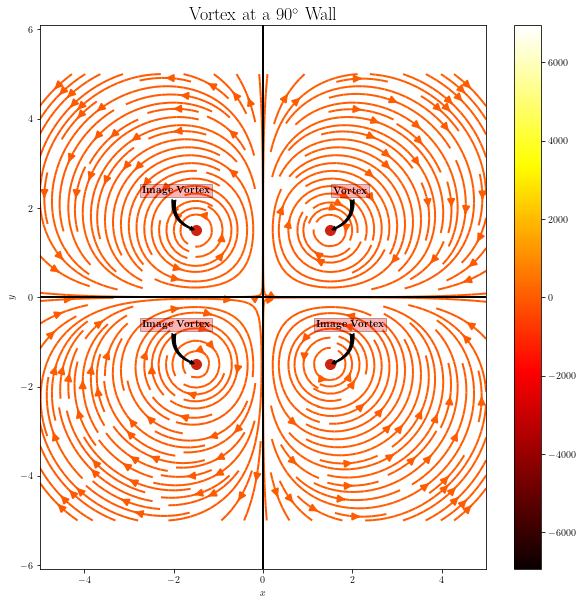

In [1106]:
Γ = 5.0                          #strength of the vortex
x_v, y_v = 1.5, 1.5              #coordinates of the vortex

#Create an object of the vortex
vortex = Vortex(Γ, x_v, y_v)
u_v, v_v = vortex.velocity(X_grid, Y_grid)
ψ_v = vortex.streamfunction(X_grid, Y_grid)
ϕ_v = vortex.velocityPotential(X_grid, Y_grid)

#Create three other objects for the image vortices
vortex_i1 = Vortex(Γ, -x_v, -y_v)
vortex_i2 = Vortex(-Γ, x_v, -y_v)
vortex_i3 = Vortex(-Γ, -x_v, y_v)

#image vortex 1
u_vi1, v_vi1 = vortex_i1.velocity(X_grid, Y_grid)
ψ_i1 = vortex_i1.streamfunction(X_grid, Y_grid)
ϕ_i1 = vortex_i1.velocityPotential(X_grid, Y_grid)

#image vortex 2
u_vi2, v_vi2 = vortex_i2.velocity(X_grid, Y_grid)
ψ_i2 = vortex_i2.streamfunction(X_grid, Y_grid)
ϕ_i2 = vortex_i2.velocityPotential(X_grid, Y_grid)

#image vortex
u_vi3, v_vi3 = vortex_i3.velocity(X_grid, Y_grid)
ψ_i3 = vortex_i3.streamfunction(X_grid, Y_grid)
ϕ_i3 = vortex_i3.velocityPotential(X_grid, Y_grid)

#Apply superposition
u_90 = u_v + u_vi1 + u_vi2 + u_vi3
v_90 = v_v + v_vi1 + v_vi2 + v_vi3
ψ_90 = ψ_v + ψ_i1 + ψ_i2 + ψ_i3
ϕ_90 = ϕ_v + ϕ_i1 + ϕ_i2 + ϕ_i3

#Plot the data and draw the corner wall
fig1 = plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Vortex at a 90$^{\circ}$ Wall', fontsize=18)
plt.axvline(x=0.0, color='k', linestyle='-', linewidth=2.0)
plt.axhline(y=0.0, color='k', linestyle='-', linewidth=2.0)
plt.scatter(x_v, y_v, s=100, color='#CD2310') 
plt.scatter(x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, y_v, s=100, color='#CD2310')
stream_v = plt.streamplot(X_grid, Y_grid, u_90, v_90, color = u_90, arrowsize=1.5, density = 2, linewidth = 2.0, cmap ='hot')
fig1.colorbar(stream_v.lines)
plt.annotate(r'\textbf{Vortex}', xy=(x_v, y_v), xytext=(20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.5', 
            color='black'));
plt.annotate(r'\textbf{Image Vortex}', xy=(x_v, -y_v), xytext=(20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.5', 
            color='black'));
plt.annotate(r'\textbf{Image Vortex}', xy=(-x_v, -y_v), xytext=(-20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.5', 
            color='black'));
plt.annotate(r'\textbf{Image Vortex}', xy=(-x_v, y_v), xytext=(-20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.5', 
            color='black'));
plt.axis('equal');

<ipython-input-1107-f647065b89aa>:16: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  CS = colorcontour.ax.contour(X_grid, Y_grid, ψ_90, origin='lower', extend='both',
<ipython-input-1107-f647065b89aa>:18: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  colorcontour.ax.clabel(CS, fontsize=10)


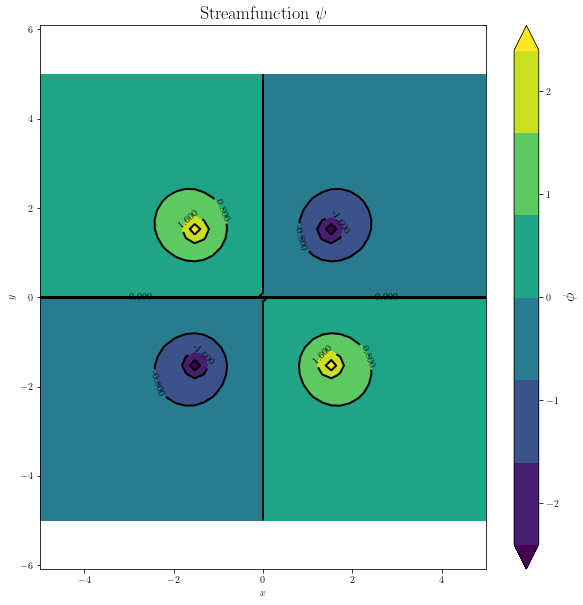

In [1107]:
#streamfunction plot
plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Streamfunction $\psi$', fontsize=18)
plt.scatter(x_v, y_v, s=100, color='#CD2310') 
plt.scatter(x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, y_v, s=100, color='#CD2310')
colorcontour = plt.contourf(X_grid, Y_grid, ψ_90, extend='both')
colorbar1 = plt.colorbar(colorcontour)
colorbar1.set_ticks([-2.0, -1.0, 0.0, 1.0, 2.0])
colorbar1.ax.set_ylabel(r'$\phi$', fontsize=16)
CS = colorcontour.ax.contour(X_grid, Y_grid, ψ_90, origin='lower', extend='both',
                linewidths=2, colors='k', linestyles='solid')
colorcontour.ax.clabel(CS, fontsize=10)
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');

<ipython-input-1108-0f99f0e89a89>:16: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  CS = colorcontour.ax.contour(X_grid, Y_grid, ϕ_90, origin='lower', extend='both',
<ipython-input-1108-0f99f0e89a89>:18: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  colorcontour.ax.clabel(CS, fontsize=10)


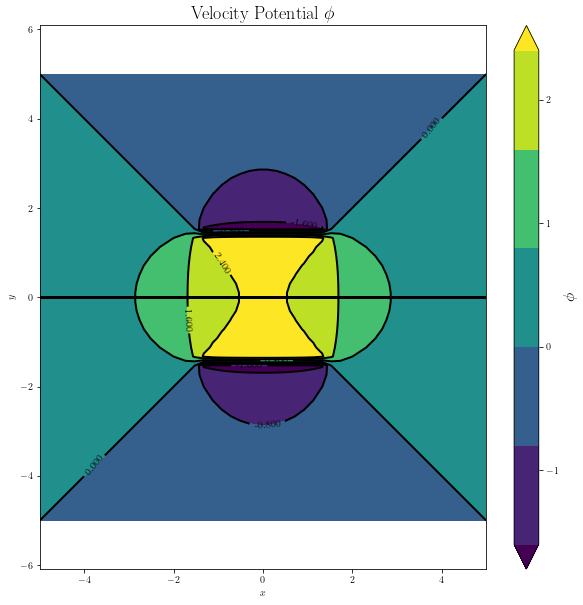

In [1108]:
#velocity potential plot
plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Velocity Potential $\phi$', fontsize=18)
plt.scatter(x_v, y_v, s=100, color='#CD2310') 
plt.scatter(x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, -y_v, s=100, color='#CD2310')
plt.scatter(-x_v, y_v, s=100, color='#CD2310')
colorcontour = plt.contourf(X_grid, Y_grid, ϕ_90, extend='both')
colorbar1 = plt.colorbar(colorcontour)
colorbar1.set_ticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
colorbar1.ax.set_ylabel(r'$\phi$', fontsize=16)
CS = colorcontour.ax.contour(X_grid, Y_grid, ϕ_90, origin='lower', extend='both',
                linewidths=2, colors='k', linestyles='solid')
colorcontour.ax.clabel(CS, fontsize=10)
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0)
plt.axis('equal');